# Lag temperatur striper

Takk til Kjersti Daae for originalversjonen til dette skriptet! Denne versjonen er tilpasset kurset NAT624 ved UiB. 

*Kjersti Daae: This notebooks reads data from output files of temperture and temperature anomaly from https://seklima.met.no/.
Choose to download both mean temperature and mean temperature anomaly for a given station (e.g. Bergen) and a given resolution (yealy, seasonal, monthly,...) over a chosen time period.*

*Here I show one example for yearly data and one for seasonal data in Bergen for the period 1980-2021.*

*The plotting part is based on the scipt by Maximilian Nöthe which you can find here: https://matplotlib.org/matplotblog/posts/warming-stripes/*

### 1) Last inn nødvendige python bibliotek

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
# Endre denne stien til der du har EkteData filene på din PC
sti='W:/Work/Documents/EkteData/ikkeGit/temperaturstriper'
# Endre dette filnavnet til det du har kalt filen du nettopp lastet ned. 
fil='/Bergen_monthly_SN50540.csv'

# Pass på at resultatet av sti+fil er nøyaktig det samme som der filen
# faktisk ligger på PCen din. 
sti+fil

'W:/Work/Documents/EkteData/ikkeGit/temperaturstriper/Bergen_monthly_SN50540.csv'

I cellen under bruker vi Pandas sin innebygde funksjon pd.read_csv() til å lese inn filen vår. Denne funksjonen leser inn csv-filer og lagrer informasjonen i en variabel, f.eks. variabelen `df` dersom vi skriver `df=pd.read_csv(file)` slik som under. For å lese inn filen riktig må man angi informasjon om formatet til filen i tillegg til filnavnet (`sti+fil`). Under beskriver vi hva disse spesifikasjonene betyr.

- `sep=';'` beskriver hva som deler kolonnene i filen. Hvis du åpner filen i f.eks. notepad ser du at dette er semikolon i vårt tilfelle, men det er ofte tab, komma (default), eller kolon. 
- `decimal=','` må være med fordi verdiene i denne csv-filen er lagret med komma som desimaltegn istedet for punktum. For at verdien skal tolkes som ett tall og ikke to må vi fortelle funksjonen pd.read_csv at den skal tolke komme som desimaltegn. 




In [46]:
df = pd.read_csv(
    sti+fil, 
    sep=';', 
    decimal=',', 
)

In [47]:
df # Vi kaller variabelen "df" som er kort for "DataFrame"

,Navn,Stasjon,Tid(norsk normaltid),Middeltemperatur (mnd),"Middeltemperatur, avvik fra normalen 1991-2020 (mnd)",Nedbør (mnd),Nedbør i forhold til normalen 1991-2020 (mnd)
0,Bergen - Florida,SN50540,jan.1980,0.9,-1.7,-,-
1,Bergen - Florida,SN50540,feb.1980,1.1,-1.2,-,-
2,Bergen - Florida,SN50540,mar.1980,2.1,-1.7,-,-
3,Bergen - Florida,SN50540,apr.1980,6.4,-0.8,-,-
4,Bergen - Florida,SN50540,mai.1980,10.8,0.1,-,-
...,...,...,...,...,...,...,...
512,Bergen - Florida,SN50540,sep.2022,12.9,0.3,"163,7",66
513,Bergen - Florida,SN50540,okt.2022,9.9,1.3,"304,6","113,7"
514,Bergen - Florida,SN50540,nov.2022,7.8,2.5,"190,7","69,3"
515,Bergen - Florida,SN50540,des.2022,-0.1,-3.8,"2,4","0,8"


Man får ut en fin tabell. Informasjonen som lå i headeren har kommet som titler på kolonnene, og man ser indeksen til hver rad helt til venstre.

For å få tak i en av kolonnene skriver man som dette:


In [6]:
df['Tid(norsk normaltid)']

0      jan.1980
1      feb.1980
2      mar.1980
3      apr.1980
4      mai.1980
         ...   
512    sep.2022
513    okt.2022
514    nov.2022
515    des.2022
516         NaN
Name: Tid(norsk normaltid), Length: 517, dtype: object

Eller: 

In [49]:
df.iloc[:,2]
# alle radene og kolonne nr 2. Denne skrivemåten er praktisk dersom det er lange
# variabelnavn eller speialtegn i variabelnavnene

0      jan.1980
1      feb.1980
2      mar.1980
3      apr.1980
4      mai.1980
         ...   
512    sep.2022
513    okt.2022
514    nov.2022
515    des.2022
516         NaN
Name: Tid(norsk normaltid), Length: 517, dtype: object

In [50]:
df['Middeltemperatur, avvik fra normalen 1991-2020 (mnd)']

0     -1.7
1     -1.2
2     -1.7
3     -0.8
4      0.1
      ... 
512    0.3
513    1.3
514    2.5
515   -3.8
516    NaN
Name: Middeltemperatur, avvik fra normalen 1991-2020 (mnd), Length: 517, dtype: float64

Vi lagrer kolonnen med tid som `tid` og kolonnen med temperatur som `temp`. Vi utelukker det siste elementet i begge radene fordi dette bare er NaN. 

In [52]:
tid=df.iloc[:,2][:-1]
temp=df.iloc[:,3][:-1]
temp_anomali=df.iloc[:,4][:-1]

In [54]:
tid, temp

(0      jan.1980
 1      feb.1980
 2      mar.1980
 3      apr.1980
 4      mai.1980
          ...   
 511    aug.2022
 512    sep.2022
 513    okt.2022
 514    nov.2022
 515    des.2022
 Name: Tid(norsk normaltid), Length: 516, dtype: object,
 0       0.9
 1       1.1
 2       2.1
 3       6.4
 4      10.8
        ... 
 511    15.6
 512    12.9
 513     9.9
 514     7.8
 515    -0.1
 Name: Middeltemperatur (mnd), Length: 516, dtype: float64)

### Del 4: Konverter variablene du trenger til Numpy
med funksjonen `df.to_numpy()`

Vi vil konvertere Pandas DataFrame (variabelene `df`, `tid`, `temp`, og `temp_anomali` er alle DataFrames) til et numpy array fordi plottebiblioteket vi bruker, `Matplotlib`, er flinkere til å behandle data på `Numpy`-format enn på `Pandas`-format. Dersom f.eks. tiden mellom måletidspunkt ikke er konstant vil `Pandas` likevel plotte dette med jevne intervall, mens `Numpy` tar stilling til selve tidverdien og plotter datapunktene med så stor avstand de skal ha. Derfor konverterer vi variablene våre fra `pandas` til `Numpy` arrays. 
Denne konverteringen er også praktisk hvis du f.eks. skal sammenligne et datasett som dette med et du har lest inn som numpy array. 

Hvis df er en DataFrame konverterer vi til numpy array med denne funksjonen: `df.to_numpy()`.

For å konvertere motsatt vei bruker man `pd.DataFrame(array)`, hvor "array" er et numpy array.

In [55]:
tid=tid.to_numpy()

In [56]:
temp=temp.to_numpy()

In [57]:
tid

array(['jan.1980', 'feb.1980', 'mar.1980', 'apr.1980', 'mai.1980',
       'jun.1980', 'jul.1980', 'aug.1980', 'sep.1980', 'okt.1980',
       'nov.1980', 'des.1980', 'jan.1981', 'feb.1981', 'mar.1981',
       'apr.1981', 'mai.1981', 'jun.1981', 'jul.1981', 'aug.1981',
       'sep.1981', 'okt.1981', 'nov.1981', 'des.1981', 'jan.1982',
       'feb.1982', 'mar.1982', 'apr.1982', 'mai.1982', 'jun.1982',
       'jul.1982', 'aug.1982', 'sep.1982', 'okt.1982', 'nov.1982',
       'des.1982', 'jan.1983', 'feb.1983', 'mar.1983', 'apr.1983',
       'mai.1983', 'jun.1983', 'jul.1983', 'aug.1983', 'sep.1983',
       'okt.1983', 'nov.1983', 'des.1983', 'jan.1984', 'feb.1984',
       'mar.1984', 'apr.1984', 'mai.1984', 'jun.1984', 'jul.1984',
       'aug.1984', 'sep.1984', 'okt.1984', 'nov.1984', 'des.1984',
       'jan.1985', 'feb.1985', 'mar.1985', 'apr.1985', 'mai.1985',
       'jun.1985', 'jul.1985', 'aug.1985', 'sep.1985', 'okt.1985',
       'nov.1985', 'des.1985', 'jan.1986', 'feb.1986', 'mar.19

#### Lag en ny tidsserie for tid fordi dataformatet i den originale filen er upraktisk
Sjekk start og slutt-tid for datasettet

In [58]:
tid[0], tid[-1]

('jan.1980', 'des.2022')

Datasettet spenner alle månedene fra januar 1980 til desember 2022. Dette blir det samme som en serie med tall fra 1980 til 2023 med 1/12 mellom hver verdi fordi det er 12 måneder i hvert år. 

In [59]:
tid=np.arange(1980, 2023, 1/12)

Sjekk at start og sluttverdi stemmer

In [60]:
tid[0], tid[-1]

(1980.0, 2022.9166666666276)

Sjekk at vektoren tid som vi har laget har samme lengde som temperaturvektoren

In [61]:
tid.shape, temp.shape

((516,), (516,))

### Del 5: lag en figur av temperatur anomaliene for å sjekke temperatur-ranget og som referanse til temperaturstipene lengre ned

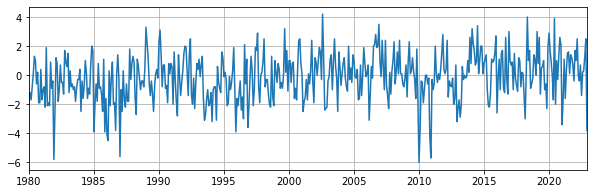

In [62]:
plt.figure(figsize=(10,3))
plt.plot(tid,temp_anomali)
plt.grid()
plt.xlim(tid[0], tid[-1])
plt.show()

### 5) Plot the temperture stripe
NB: Vær obs på at hvis du endrer tidsintervallet du plotter endrer du også hvilken temperatur som har hvilken farge. 

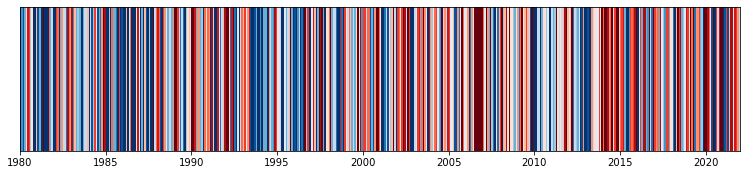

In [72]:
#choose time period and temperature range to fit your data
FIRST = 1980 #first year to include
LAST  = 2021 #last year to include
# include temperature from +-LIM degrees (From the figure above we see 
# that +-2 degrees is adequate)
LIM = 2 

#colormap from the classical temperture stripes containing 8 blue 
# and 8 red colors
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])

fig = plt.figure(figsize=(10, 2))
ax = fig.add_axes([0, 0, 1, 1])
# Uncomment below if you want a clean figure without ticks and ticklabels
#ax.set_axis_off() 

# Create a collection with a rectangle for each stripe
# Set the width of each stripe. For annual data you typically choose width=1, 
# for monthly you choose width=1/12
width=1/12 
col = PatchCollection([
    Rectangle((y, 0), width, 1)
    for y in np.arange(FIRST, LAST + 1,width)
])

# set data, colormap and color limits
col.set_array(temp_anomali)
col.set_cmap(cmap)
col.set_clim(- LIM, LIM) # set the temperature range
ax.add_collection(col) #this is where you add the colors

ax.set_ylim(0, 1)
ax.set_yticks([]) #no need for yticks
ax.set_xlim(FIRST, LAST + 1) #set the time range
plt.show()

